<a href="https://colab.research.google.com/github/PatTheAtak/MNIST-CNN/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An MNIST Image Classifier using Convolutional Neural Network

In [1]:
# import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

In [2]:
# load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# 60K train samples 28 * 28
X_train.shape

(60000, 28, 28)

In [4]:
# visualize a single image
img_one = X_train[3]
img_one

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
img_one.shape

(28, 28)

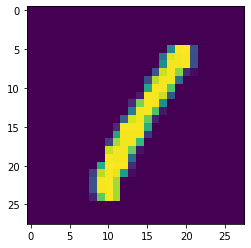

In [6]:
plt.imshow(img_one)

## Data Preprocessing

In [7]:
# One Hot encode our test labels
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [8]:
print(y_test.shape)
print(y_train.shape)

(10000,)
(60000,)


In [9]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

## Standardization of the data

In [10]:
# The images ranges between 0 and 255 pixels
print(img_one.max())
print(img_one.min())

255
0


In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
scaled_single = X_train[3]
print(scaled_single.max())
print(scaled_single.min())

1.0
0.0


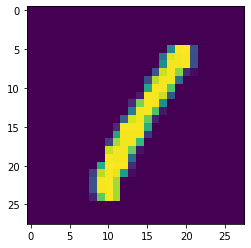

In [13]:
# Same number is displayed after scaling
plt.imshow(scaled_single)

## Reshaping the data

Right now the data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
# reshaping to include the 1 dimension
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [17]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Train the model

In [18]:
model = Sequential()

# CONVOLUTIONAL LAYER 1
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER 2
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
model.fit(X_train,y_cat_train,epochs=100,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2944 - accuracy: 0.9096 - val_loss: 0.0416 - val_accuracy: 0.9867
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0336 - val_accuracy: 0.9886
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0282 - accuracy: 0.9903 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0242 - val_accuracy: 0.9919
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0333 - val_accuracy: 0.9889
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 0.0307 - val_accuracy: 0.9902


## Model Evaluation

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
losses = pd.DataFrame(model.history.history)

In [24]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.127428,0.961333,0.041563,0.9867
1,0.041558,0.986883,0.033580,0.9886
2,0.028137,0.990767,0.033661,0.9888
3,0.021549,0.992850,0.024186,0.9919
4,0.016166,0.994900,0.033275,0.9889


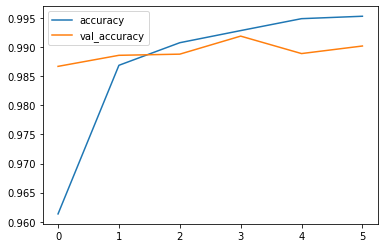

In [25]:
losses[['accuracy','val_accuracy']].plot()

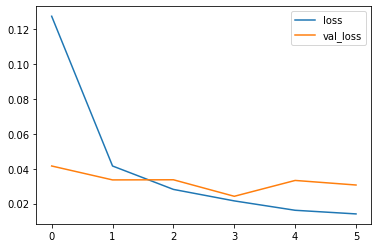

In [26]:
losses[['loss','val_loss']].plot()

In [28]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.030654791742563248, 0.9901999831199646]


In [37]:
predictions = np.argmax(model.predict(X_test), axis=1)
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Predicting Random Number

In [32]:
new_num = X_test[3]

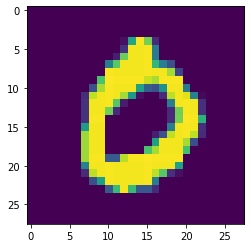

In [33]:
plt.imshow(new_num.reshape(28,28))